In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11920\1060489882.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df = pd.read_csv("C:\\pycharm transfers\\weatherAUS.csv.")
df.head()
df.shape

(145460, 23)

In [6]:
dfs = df.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis=1)
dfs['RainToday'] = df['RainToday'].replace(to_replace=['No', 'Yes'], value=[0, 1])
dfs['RainTomorrow'] = df['RainTomorrow'].replace(to_replace=['No', 'Yes'], value=[0, 1])
dfs = dfs.fillna(0)
dfs.head()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_11920\2522151102.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs['RainToday'] = df['RainToday'].replace(to_replace=['No', 'Yes'], value=[0, 1])
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11920\2522151102.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfs['RainTomorrow'] = df['RainTomorrow'].replace(to_replace=['No', 'Yes'], value=[0, 1])


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,0.0,0.0,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,0.0,16.9,21.8,0.0,0.0
1,7.4,25.1,0.0,0.0,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,0.0,0.0,17.2,24.3,0.0,0.0
2,12.9,25.7,0.0,0.0,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,0.0,2.0,21.0,23.2,0.0,0.0
3,9.2,28.0,0.0,0.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,0.0,0.0,18.1,26.5,0.0,0.0
4,17.5,32.3,1.0,0.0,0.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


In [8]:
def norm(X):
    mean = np.mean(X, axis=0)
    sd = np.std(X, axis=0)
    X_norm = (X - mean) / sd
    
    return(X_norm)

normdf = norm(np.array(dfs))

In [9]:
def EuclidianDistance(centroids, dp):
    ED = np.sqrt(np.sum((centroids - dp)**2, axis=1))
    return (ED)

In [10]:
def Kmeans(data,k,epochs):
    centroids = np.random.uniform(np.amin(data,axis=0),np.amax(data,axis=0),size=(k,data.shape[1]))
    print (centroids)
    for i in range (epochs):
        y = []
        for dp in data:
            distance = EuclidianDistance(dp,centroids)
            k_num = np.argmin(distance)
            y.append(k_num)
        y = np.array(y)
        cluster_index = []
        for j in range(k):
            cluster_index.append(np.argwhere(y==j))
        cluster_centers = []
        for i,indices in enumerate(cluster_index):
            if len(indices) == 0:
                cluster_centers.append(centroids[i])
            else:
                cluster_centers.append(np.mean(data[indices],axis=0)[0])
        if np.max (centroids - np.array(cluster_centers))<0.0001:
            break
        else :
            centroids = np.array(cluster_centers)
    return y

In [12]:
k = 4
epochs = 1000
cluster_assignments = Kmeans(normdf, k, epochs)

[[ 3.87451059e-01  2.89411615e+00  2.14015755e+01  3.47614059e+00
   1.74672021e+00  5.43443957e+00  1.21029455e+01  4.83826130e+00
  -1.58017525e+00 -1.06142892e+00 -2.56710737e-01 -2.97056530e-01
  -2.78728254e-01  1.47878738e+00  3.13915700e+00 -9.04915757e-03
  -5.11372159e-01  2.19624397e-01]
 [ 2.89135049e+00  1.95348371e-01  8.94584887e-01  2.37551078e+01
   5.01772249e-01 -1.94089653e+00  8.49281797e+00  2.56214244e+00
  -9.94384332e-01 -1.04621962e+00 -1.09760759e+00 -1.93661645e+00
   1.63016076e+00  1.95563360e-03  2.96944455e+00 -3.01610598e+00
   1.86270245e+00  1.85347691e+00]
 [ 3.32233755e+00 -1.87545080e+00  8.98240998e+00  2.17883281e+01
   9.99064355e-01  4.11800930e+00  6.82288754e+00  2.23022306e+00
  -1.71021848e+00  5.14404908e-03 -1.23363323e+00 -1.16531083e+00
   7.38011355e-02  1.89646279e-01 -6.86969286e-01 -2.82583686e+00
   1.17996093e+00  1.34026230e+00]
 [-2.76371869e+00  1.07048308e-01  8.48373022e+00  1.74927225e+01
   1.00163662e+00 -1.23437214e+00 -1.

[2 2 1 ... 2 2 2]


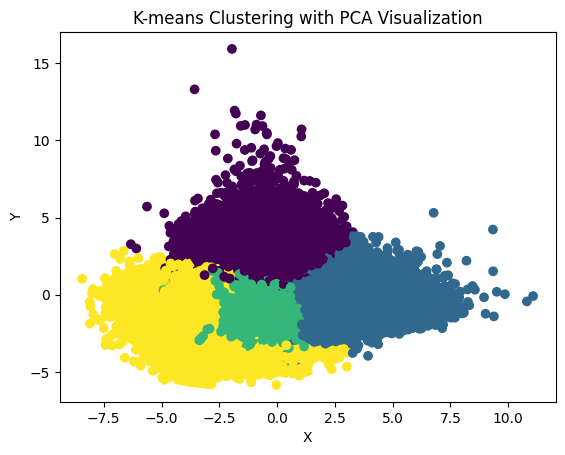

In [16]:
pca = PCA(n_components=8)
normdf_pca = pca.fit_transform(normdf)
print (cluster_assignments)
plt.scatter(normdf_pca[:, 0], normdf_pca[:, 1], c=cluster_assignments)
plt.title('K-means Clustering with PCA Visualization')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()